In [1]:
import torch
from torchvision import models
from itertools import chain
from collections import OrderedDict
import copy
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from skimage import transform
import pandas as pd
import json
from mnist_model import Net
from LRP import LRP

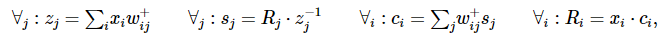

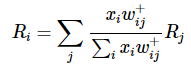

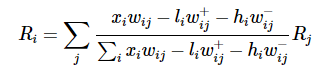

# MNIST test

In [2]:
model = Net()
model.load_state_dict(torch.load('mnist_model.ph'))
model = model.eval()

In [3]:
lrp = LRP(model)

In [4]:
test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=1, shuffle=True)

Label  8
Prediction 8


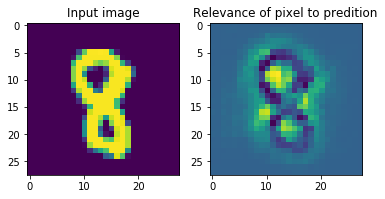

Label  3
Prediction 3


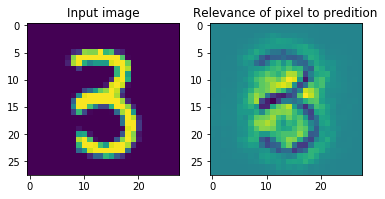

Label  9
Prediction 9


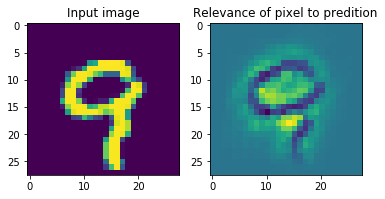

Label  3
Prediction 3


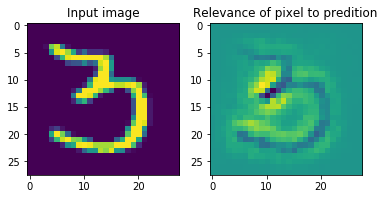

In [5]:
for num, (image, label) in enumerate(test_loader):
    if num > 3:
        break
    print('Label ', label.item())
    output = lrp.forward(image)
    print('Prediction', output.argmax().item())
    _, ax = plt.subplots(1,2)
    ax[0].imshow(image.squeeze())
    ax[0].title.set_text('Input image')
    relevance = lrp(output)
    ax[1].imshow(relevance.squeeze())
    ax[1].title.set_text('Relevance of pixel to predition')
    plt.show()
  

### Mistakes

Label  0
Prediction 6


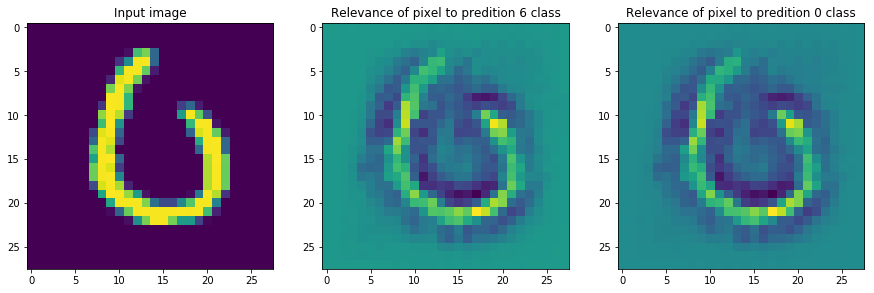

Label  0
Prediction 8


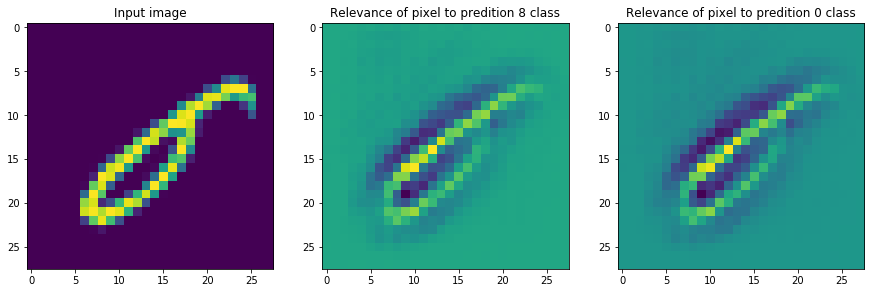

Label  4
Prediction 9


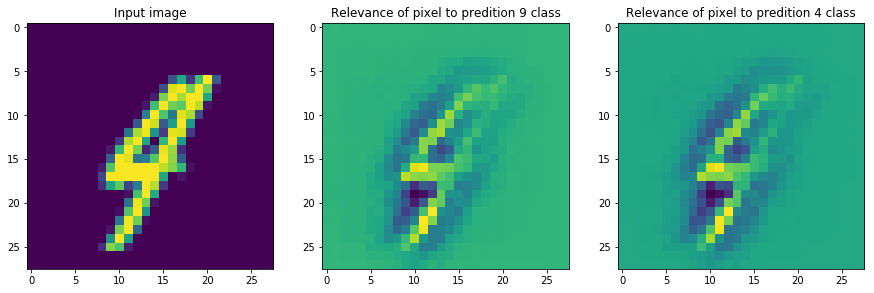

Label  5
Prediction 6


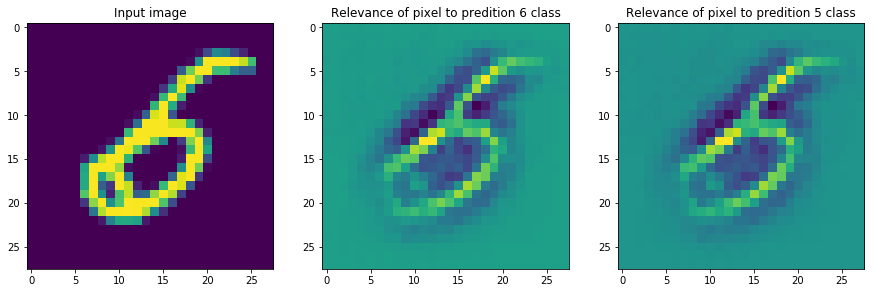

In [6]:
count = 0
for num, (image, label) in enumerate(test_loader):
    if count > 3:
        break
    output = lrp.forward(image)
    if output.argmax() != label:
        count += 1
        print('Label ', label.item())
        print('Prediction', output.argmax().item())
        _, ax = plt.subplots(1,3, figsize=(15,15))
        ax[0].imshow(image.squeeze())
        ax[0].title.set_text('Input image')
       
        R1 = torch.zeros_like(output)
        R1[0, output.argmax().item()] = 1
        relevance1 = lrp(R1)
        ax[1].imshow(relevance1.squeeze())
        ax[1].title.set_text('Relevance of pixel to predition {} class'.format(output.argmax().item()))
        
        R2 = torch.zeros_like(output)
        R2[0, label.item()] = 1
        relevance2 = lrp(R2)
        ax[2].imshow(relevance2.squeeze())
        ax[2].title.set_text('Relevance of pixel to predition {} class'.format(label.item()))
        plt.show()

In [7]:
R1

tensor([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [8]:
R2

tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [9]:
(relevance1 - relevance2).mean()

tensor(0.0027)

In [10]:
relevance2.max()

tensor(0.0365)